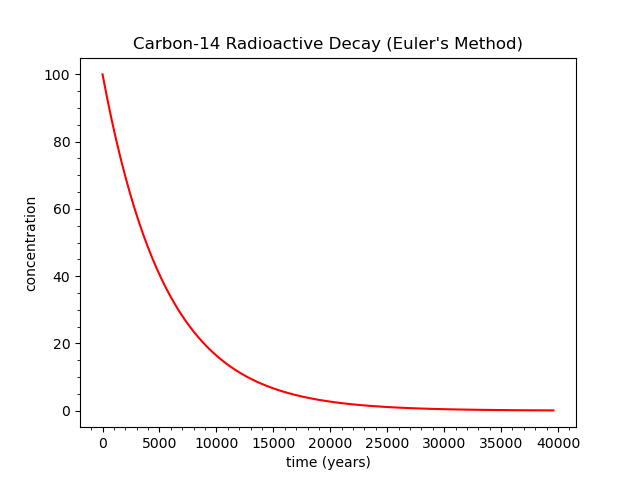

In [1]:
# euler_nuclear_decay.ipynb

# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

atom_name = "Carbon-14"
time_scale = "years"
tau = 5730
time_final = 40_000

def d_n(n, t):
    # Radioactive decay rate
    return -n / tau


def euler(v1, u, h, f1):
    # Implements Euler's method
    # for a single ODE (f1), with one
    # dependent variable (v1) and the
    # independent variable (u) having step size (h)
    next_v1 = v1 + f1(v1, u) * h
    next_u = u + h
    return next_v1, next_u


def plot(ax):
    # Defining the frequency we will measure at
    time_steps = 100
    delta_time = time_final / time_steps

    time_array = np.zeros(time_steps)
    nuclei_array = np.zeros(time_steps)

    time_array[0] = 0  # set initial time value
    nuclei_array[0] = 100  # set initial concentration

    time = time_array[0]
    nuclear = nuclei_array[0]

    for step in range(1, time_steps):
        nuclear, time = euler(nuclear, time, delta_time, d_n)
        # Adding the data to the arrays we created
        nuclei_array[step] = nuclear
        time_array[step] = time

    ax.set_title(f"{atom_name} Radioactive Decay (Euler's Method)")
    ax.set_xlabel(f"time ({time_scale})")
    ax.set_ylabel("concentration")

    ax.plot(time_array, nuclei_array, color="red", linestyle="solid")

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def simulate_decay():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


simulate_decay()

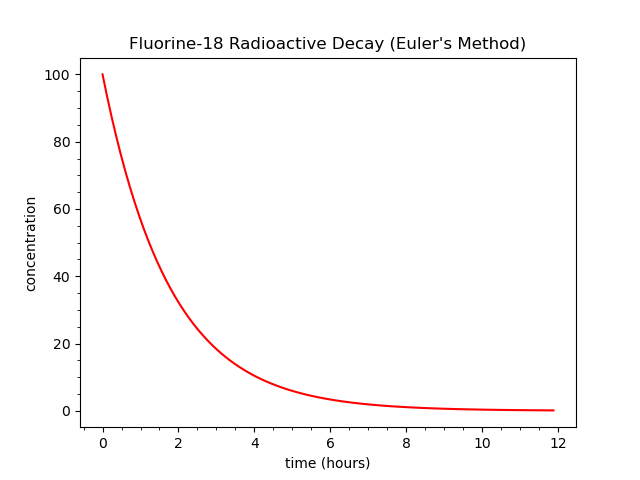

In [2]:
# Cell 2

atom_name = "Fluorine-18"
time_scale = "hours"
tau = 6586.0 / 60 / 60
time_final = 12

simulate_decay()